In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular import *
%matplotlib inline
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hack-ml/Dataset/sample_submission.csv
/kaggle/input/hack-ml/Dataset/Train.csv
/kaggle/input/hack-ml/Dataset/Test.csv


In [2]:
train = pd.read_csv('../input/hack-ml/Dataset/Train.csv')
test = pd.read_csv('../input/hack-ml/Dataset/Test.csv')

In [3]:
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
print('NaN in Train:',train.isnull().values.any())
print('NaN in Test:',test.isnull().values.any())
print('Train set overview:')
display(train.head())

Train set shape: (26048, 12)
Test set shape: (6513, 11)
NaN in Train: False
NaN in Test: False
Train set overview:


,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


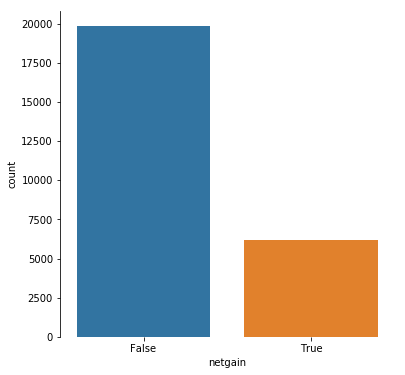

In [4]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="netgain", data=train, label="Label count")
sns.despine(bottom=True)

In [5]:
del train['id']
del test['id']

In [6]:
dep_var='netgain'
cat = ['realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 'airlocation',
       'expensive', 'money_back_guarantee']
cont = ['average_runtime(minutes_per_week)','ratings']
procs= [Categorify,Normalize]

inception = TabularList.from_df(test,cat_names=cat, cont_names=cont , procs=procs)
data = (TabularList.from_df(train, cat_names=cat, cont_names=cont , procs=procs)
                .split_subsets(train_size=0.8, valid_size=0.2, seed=34)
                .label_from_df(cols=dep_var)
                .add_test(inception)
                .databunch())

In [7]:
learn = tabular_learner(data, layers=[200,100],metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.45E-02


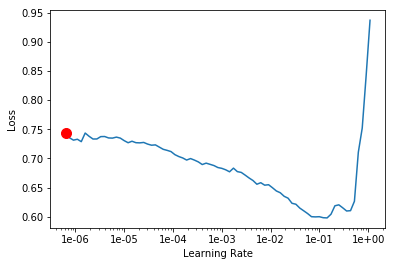

In [8]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [9]:
learn.fit(1,lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.402752,0.405158,0.798618,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 4.37E-04


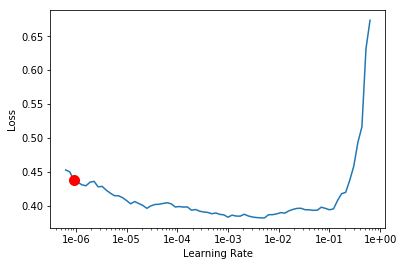

In [10]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [11]:
learn.fit_one_cycle(1,max_lr=1e-8)

epoch,train_loss,valid_loss,accuracy,time
0,0.398736,0.403657,0.799770,00:05


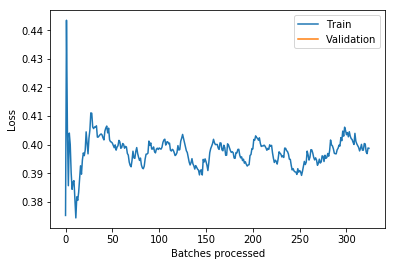

In [12]:
learn.recorder.plot_losses()

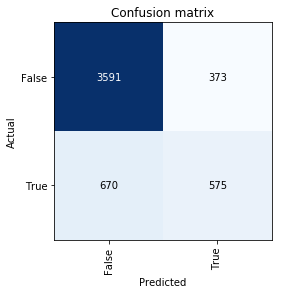

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
learn.predict(inception[0])[0]

Category True